First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     

<ipython-input-1-351e018b8b13>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').mean())
<ipython-input-1-351e018b8b13>:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').std())


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650


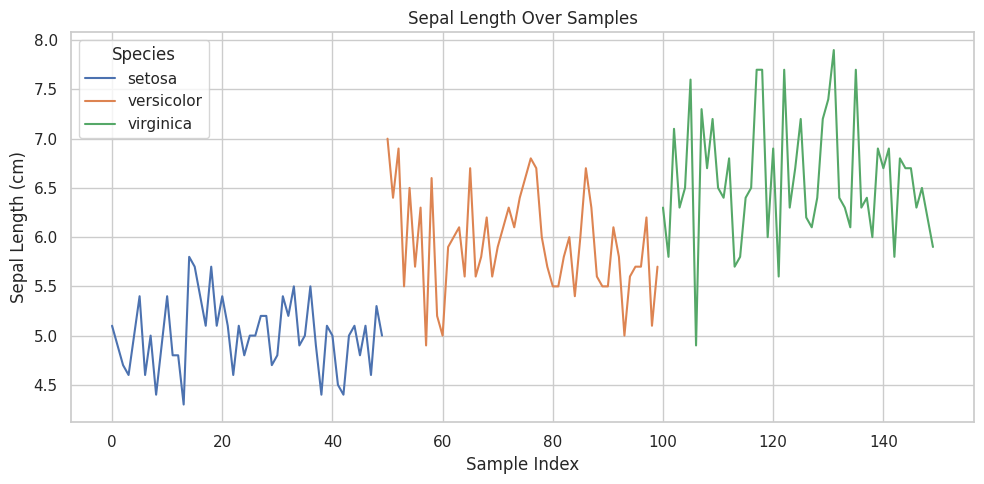

<ipython-input-1-351e018b8b13>:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='species', y='petal_length', ci=None)


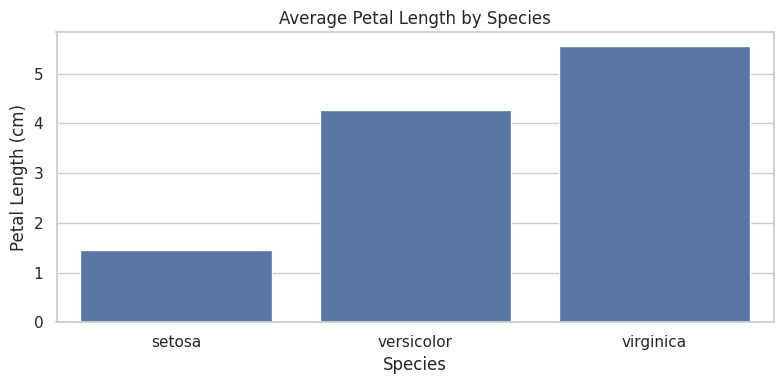

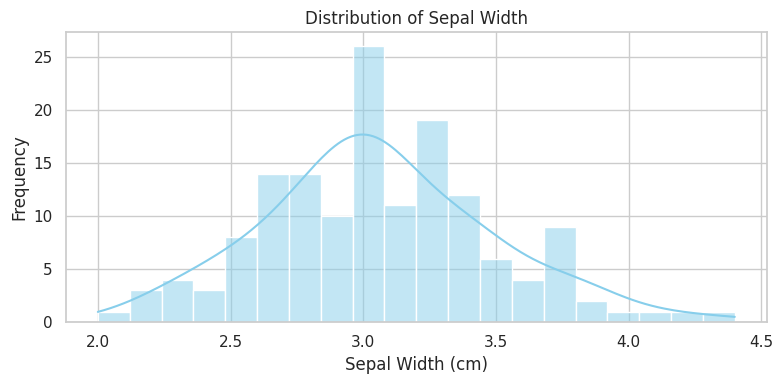

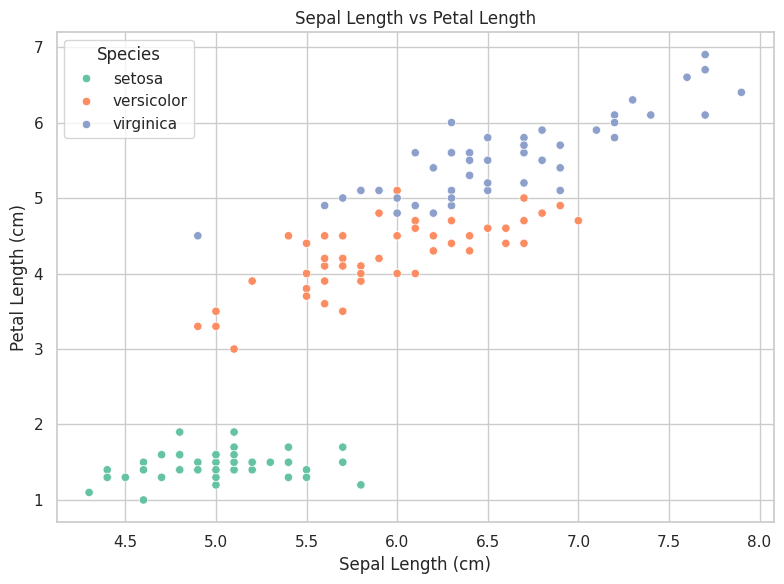

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Set seaborn style
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset
try:
    # Load Iris dataset from sklearn
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    # Rename columns for easier handling
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Check structure and missing values
    print("\nDataset info:")
    print(df.info())

    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Clean data (no missing values in this dataset)
    df.dropna(inplace=True)

except FileNotFoundError:
    print("Error: The dataset file was not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Task 2: Basic Data Analysis
print("\nDescriptive statistics:")
print(df.describe())

print("\nMean values grouped by species:")
print(df.groupby('species').mean())

print("\nStandard deviation by species:")
print(df.groupby('species').std())

# Task 3: Data Visualization

# 1. Line chart - sepal length trend over index
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=range(len(df)), y='sepal_length', hue='species')
plt.title('Sepal Length Over Samples')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

# 2. Bar chart - average petal length per species
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='species', y='petal_length', ci=None)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.tight_layout()
plt.show()

# 3. Histogram - distribution of sepal width
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='sepal_width', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter plot - sepal length vs petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()
